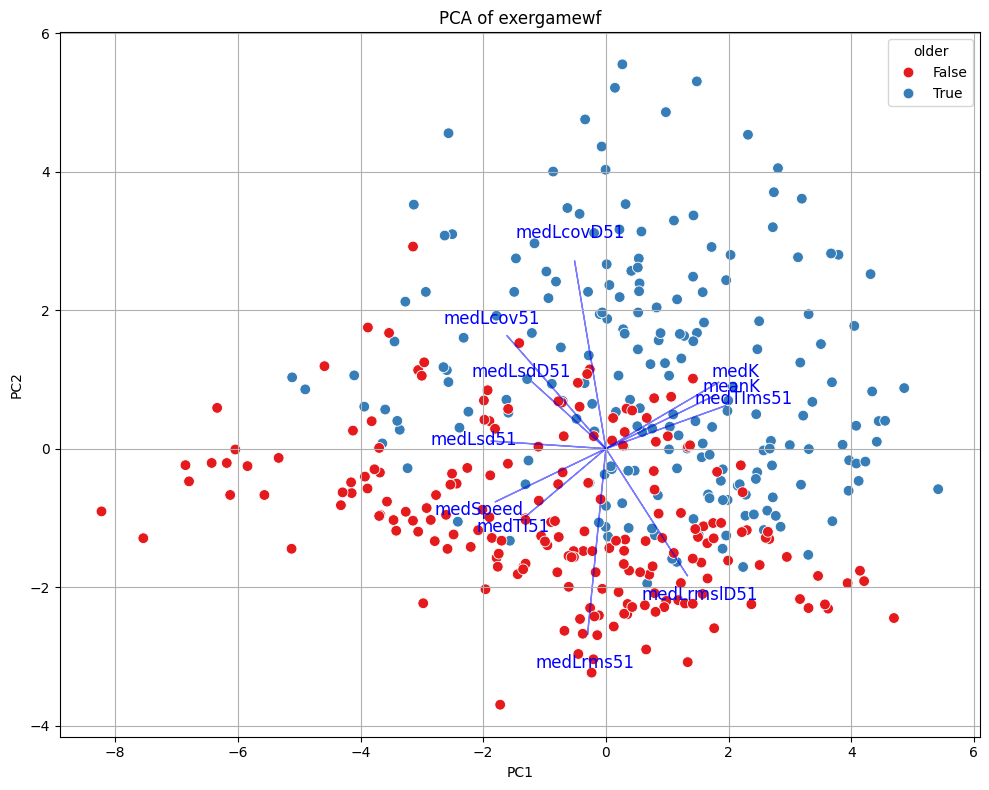

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
wtable = pd.read_csv("../../data/exergamewf.csv")

# Select columns 5 to 15 (Python index 4:15)
X = wtable.iloc[:, 4:15]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
tpca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(tpca, columns=[f'PC{i+1}' for i in range(tpca.shape[1])])
pca_df['older'] = wtable['older']

# Plot PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='older', data=pca_df, palette='Set1', s=60)

# Plot loadings
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, x*5, y*5, color='blue', alpha=0.5)
    plt.text(x*5*1.15, y*5*1.15, X.columns[i], color='blue', ha='center', va='center', fontsize=12)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of exergamewf')
plt.grid(True)
plt.tight_layout()
plt.show()